In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from termcolor import colored
from scipy.stats import gamma

In [2]:
with open('Results/l2lore_results_03_13_2024_14_38.pickle', 'rb') as pickle_file:
    german = pickle.load(pickle_file)

with open('Results/baseline_results_03_20_2024_18_45.pickle', 'rb') as pickle_file:
    baseline = pickle.load(pickle_file)

In [3]:
german.keys()

dict_keys(['training', 'calibration', 'predictions', 'evaluation'])

In [19]:
german['calibration'].keys()

dict_keys(['classification_quality', 'rejection_quality', 'nonrejected_accuracy', 'rejected_samples', 'rej_class_report', 'tau'])

In [25]:
german['evaluation'].keys()

dict_keys(['n_rejected', 'classification_quality', 'rejection_quality', 'nonrejected_accuracy', 'rejected_samples', 'rej_class_report'])

In [3]:
def n_from_rejection_rate(cov, n_test):
    # rejection rate = n_rejected / sample_size
    return int(cov * n_test)

In [4]:

german['evaluation']['n_rejected']

43

### Training


Text(0.5, 1.0, 'Rejection rate vs non-rejected accuracy')

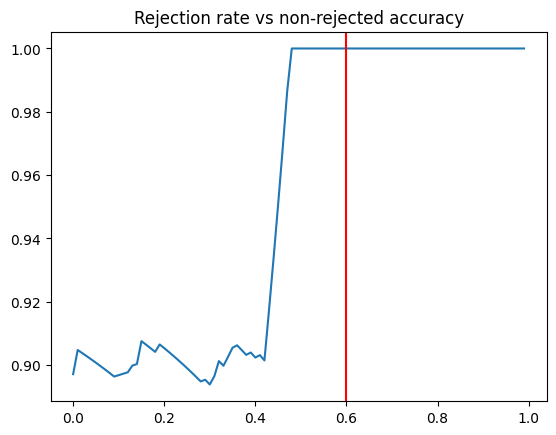

In [5]:
dataset = 'training'
metric = 'nonrejected_accuracy'
n_sample = len(german[dataset][metric])
#n_rejected = german[dataset]['n_rejected']

#coverage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rej_rate_list = np.linspace(0,0.99,num=100)
acc_by_rej_rate = []
for rej in rej_rate_list:
    n_rej = n_from_rejection_rate(rej, n_sample)
    acc_by_rej_rate.append(german[dataset][metric][n_rej])

#frac_rej = np.divide(n_rejected, n_sample-1)
    
plt.plot(rej_rate_list, acc_by_rej_rate)

max_rejected = 0.6
#plt.plot(german['evaluation']['nonrejected_accuracy'].values())
#plt.scatter(frac_rej, german[dataset][metric][n_rejected], label='n rejected test samples')
plt.axvline(x = max_rejected, color = 'r', label = 'max rejection rate')
plt.title('Rejection rate vs non-rejected accuracy')

### Calibration

In [6]:
dataset = 'calibration'
metric = 'nonrejected_accuracy'
n_sample = len(german[dataset][metric])
n_rejected = 48 # german[dataset]['n_rejected']

#coverage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rej_rate_list = np.linspace(0,0.99,num=100)
acc_by_rej_rate = []
miscl_by_rej_rate = []
for rej in rej_rate_list:
    n_rej = n_from_rejection_rate(rej, n_sample)
    acc_by_rej_rate.append(german[dataset][metric][n_rej])
    miscl_by_rej_rate.append(german[dataset]['misprediction_by_n_rejected'][n_rej])

frac_rej = np.divide(n_rejected, n_sample-1)
    

Text(0.5, 1.0, 'Rejection rate vs non-rejected accuracy')

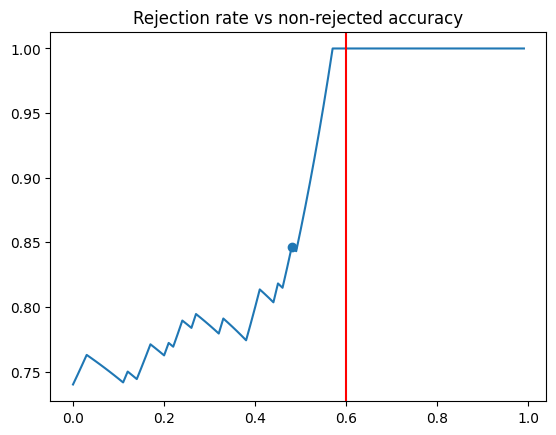

In [17]:
plt.plot(rej_rate_list, acc_by_rej_rate)
#plt.plot(rej_rate_list, miscl_by_rej_rate)

max_rejected = 0.6
#plt.plot(german['evaluation']['nonrejected_accuracy'].values())
plt.scatter(frac_rej, german[dataset][metric][n_rejected], label='n rejected test samples')
plt.axvline(x = max_rejected, color = 'r', label = 'max rejection rate')
plt.title('Rejection rate vs non-rejected accuracy')

### Test

In [ ]:
def get_baseline_metric(model_dict, metric):
    metric_dict = dict()
    for k, v in model_dict.items():
        metric_dict[k] = v[metric]
    return metric_dict

#### Non-rejected accuracy

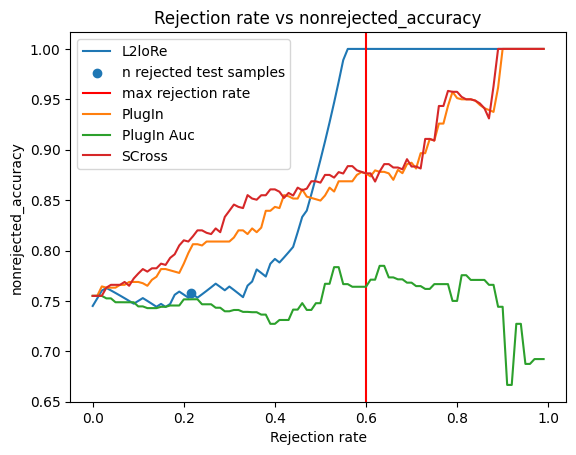

In [19]:
dataset = 'evaluation'
metric = 'nonrejected_accuracy'
n_sample = len(german[dataset][metric])
n_rejected = german[dataset]['n_rejected']

#coverage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rej_rate_list = np.linspace(0,0.99,num=100)
acc_by_rej_rate = []
for rej in rej_rate_list:
    n_rej = n_from_rejection_rate(rej, n_sample)
    acc_by_rej_rate.append(german[dataset][metric][n_rej])

frac_rej = np.divide(n_rejected, n_sample-1)
    
plt.plot(rej_rate_list, acc_by_rej_rate, label='L2loRe')

max_rejected = 0.6
#plt.plot(german['evaluation']['nonrejected_accuracy'].values())
plt.scatter(frac_rej, german[dataset][metric][n_rejected], label='n rejected test samples')
plt.axvline(x = max_rejected, color = 'r', label = 'max rejection rate')

baseline_plg = get_baseline_metric(baseline['PLG'], metric)
plt.plot(baseline_plg.keys(), baseline_plg.values(), label='PlugIn')

baseline_plg_auc = get_baseline_metric(baseline['PLGAUC'], metric)
plt.plot(baseline_plg_auc.keys(), baseline_plg_auc.values(), label='PlugIn Auc')

baseline_scr = get_baseline_metric(baseline['SCR'], metric)
plt.plot(baseline_scr.keys(), baseline_scr.values(), label='SCross')

plt.title('Rejection rate vs ' + metric)
plt.xlabel('Rejection rate')
plt.ylabel(metric)
plt.legend()
plt.show()

#### Classification quality

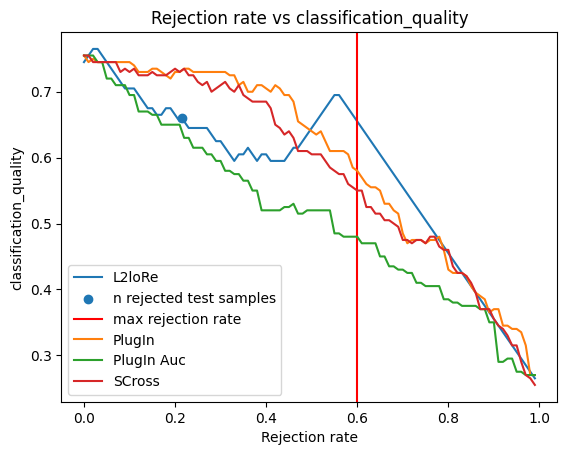

In [20]:
dataset = 'evaluation'
metric = 'classification_quality'
n_sample = len(german[dataset][metric])
n_rejected = german[dataset]['n_rejected']

#coverage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rej_rate_list = np.linspace(0,0.99,num=100)
acc_by_rej_rate = []
for rej in rej_rate_list:
    n_rej = n_from_rejection_rate(rej, n_sample)
    acc_by_rej_rate.append(german[dataset][metric][n_rej])

frac_rej = np.divide(n_rejected, n_sample-1)
    
plt.plot(rej_rate_list, acc_by_rej_rate, label='L2loRe')

max_rejected = 0.6
#plt.plot(german['evaluation']['nonrejected_accuracy'].values())
plt.scatter(frac_rej, german[dataset][metric][n_rejected], label='n rejected test samples')
plt.axvline(x = max_rejected, color = 'r', label = 'max rejection rate')

baseline_plg = get_baseline_metric(baseline['PLG'], metric)
plt.plot(baseline_plg.keys(), baseline_plg.values(), label='PlugIn')

baseline_plg_auc = get_baseline_metric(baseline['PLGAUC'], metric)
plt.plot(baseline_plg_auc.keys(), baseline_plg_auc.values(), label='PlugIn Auc')

baseline_scr = get_baseline_metric(baseline['SCR'], metric)
plt.plot(baseline_scr.keys(), baseline_scr.values(), label='SCross')

plt.title('Rejection rate vs ' + metric)
plt.xlabel('Rejection rate')
plt.ylabel(metric)
plt.legend()
plt.show()

#### Rejection quality

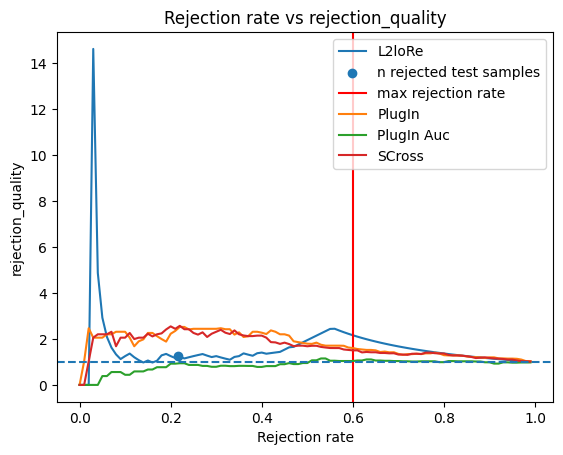

In [23]:
dataset = 'evaluation'
metric = 'rejection_quality'
n_sample = len(german[dataset][metric])
n_rejected = german[dataset]['n_rejected']

#coverage = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
rej_rate_list = np.linspace(0,0.99,num=100)
acc_by_rej_rate = []
for rej in rej_rate_list:
    n_rej = n_from_rejection_rate(rej, n_sample)
    acc_by_rej_rate.append(german[dataset][metric][n_rej])

frac_rej = np.divide(n_rejected, n_sample-1)
    
plt.plot(rej_rate_list, acc_by_rej_rate, label='L2loRe')

max_rejected = 0.6
#plt.plot(german['evaluation']['nonrejected_accuracy'].values())
plt.scatter(frac_rej, german[dataset][metric][n_rejected], label='n rejected test samples')
plt.axvline(x = max_rejected, color = 'r', label = 'max rejection rate')

baseline_plg = get_baseline_metric(baseline['PLG'], metric)
plt.plot(baseline_plg.keys(), baseline_plg.values(), label='PlugIn')

baseline_plg_auc = get_baseline_metric(baseline['PLGAUC'], metric)
plt.plot(baseline_plg_auc.keys(), baseline_plg_auc.values(), label='PlugIn Auc')

baseline_scr = get_baseline_metric(baseline['SCR'], metric)
plt.plot(baseline_scr.keys(), baseline_scr.values(), label='SCross')

plt.axhline(1, linestyle='--')

plt.title('Rejection rate vs ' + metric)
plt.xlabel('Rejection rate')
plt.ylabel(metric)
plt.legend()
plt.show()


In [34]:
def get_n_rejected(x):
    for i in range(len(german['predictions']['y_predictions'])):
        inst = german['predictions']['y_predictions'][i]
        if inst.x == x:
            return i

In [46]:
print(german['predictions']['y_predictions'][get_n_rejected(678)].explanation)

The instance x = 678 has been REJECTED.
In fact, it would have been classified by the black-box as default=1 with 0.55 predicted probability, 
but 1 counterfactuals of different classes were found in close proximity:
1) default=0: 
	Predicted probabilities: 0: 0.69, 1: 0.31, 
	Changes needed: 
		- installment_as_income_perc <= 1.71(original value:4.0)
		- credits_this_bank > 1.08(original value:1.0)


In [27]:
german['predictions']['rejected_list'][:10]

[892, 800, 487, 473, 678, 179, 985, 341, 182, 236]

In [44]:
all_x = [i.x for i in german['predictions']['y_predictions'] ]

In [53]:
selected = [x for x in all_x if x not in german['predictions']['rejected_list']]

In [54]:
selected[:10]

[615, 354, 23, 460, 921, 529, 285, 386, 288, 26]

In [60]:
german['predictions']['y_predictions'][get_n_rejected(615)].explanation

In [51]:
print(german['predictions']['y_predictions'][selected[0]].explanation)

IndexError: list index out of range